In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from anomaly_flow.data.netflow import NetFlowV2
from anomaly_flow.train.trainer_flow_nids import GANomaly
from pathlib import Path
import tensorflow as tf 
import json
from anomaly_flow.data.synthetic_data import generate_synthetic_data
from anomaly_flow.view.distribution_plot import generate_dist_plot

l:\Experimentos\anomaly-flow\.env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

hps = dict()

with open('hps.json', 'r', encoding='utf-8') as file:
    hps = json.load(file)

In [3]:
dataset_name = "NF-CSE-CIC-IDS2018-v2-DDoS-downsample"
netflow_dataset = NetFlowV2(dataset_name)

netflow_dataset.configure(
    hps["batch_size"], 52, 1,
    hps["shuffle_buffer_size"], True, True
)

Loading dataset NF-ToN-IoT-v2-DDoS-downsample...
Loaded dataset NF-ToN-IoT-v2-DDoS-downsample [OK]
Initialized Columns Split Preprocessing.
Using cached file: 0c64a61de3189470f64df188bc55130f.
Finished Columns Split Preprocessing. [OK]
Experiments using the following columns: 
PROTOCOL
IN_BYTES
IN_PKTS
OUT_BYTES
OUT_PKTS
FLOW_DURATION_MILLISECONDS
DURATION_IN
DURATION_OUT
MIN_TTL
MAX_TTL
LONGEST_FLOW_PKT
SHORTEST_FLOW_PKT
MIN_IP_PKT_LEN
MAX_IP_PKT_LEN
SRC_TO_DST_SECOND_BYTES
DST_TO_SRC_SECOND_BYTES
RETRANSMITTED_IN_BYTES
RETRANSMITTED_IN_PKTS
RETRANSMITTED_OUT_BYTES
RETRANSMITTED_OUT_PKTS
SRC_TO_DST_AVG_THROUGHPUT
DST_TO_SRC_AVG_THROUGHPUT
NUM_PKTS_UP_TO_128_BYTES
NUM_PKTS_128_TO_256_BYTES
NUM_PKTS_256_TO_512_BYTES
NUM_PKTS_512_TO_1024_BYTES
NUM_PKTS_1024_TO_1514_BYTES
TCP_WIN_MAX_IN
TCP_WIN_MAX_OUT
ICMP_TYPE
ICMP_IPV4_TYPE
DNS_QUERY_ID
DNS_QUERY_TYPE
DNS_TTL_ANSWER
URGENT_POINTER
ACKNOWLEDGEMENT
PUSH
RESET
SYNCHRONISATION
FIN
CLIENT_URGENT_POINTER
CLIENT_ACKNOWLEDGEMENT
CLIENT_PUSH
CL

In [4]:
netflow_trainer = GANomaly(netflow_dataset, hps, tf.summary.create_file_writer("logs"), Path("log"))

netflow_trainer.train(
    hps["epochs"], hps["adversarial_loss_weight"], hps["contextual_loss_weight"],
    hps["enc_loss_weight"], hps["step_log_frequency"]
)

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256)               710400    
                                                                 
 dense_3 (Dense)             multiple                  256       
                                                                 
Total params: 710656 (2.71 MB)
Trainable params: 710656 (2.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              54272     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 1024)              0         
                                                                 


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


Validation Current AUC ROC: 0.595815122127533
Best AUC-ROC on validation set:  0.595815122
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_6 (Dense)             (None

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              54272     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                           

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256)               710400    
                                                                 
 dense_3 (Dense)             multiple                  256       
                                                                 
Total params: 710656 (2.71 MB)
Trainable params: 710656 (2.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


Step  4600 . d_loss:  1.38581383 , g_loss:  1.32058132 , e_loss:  0.000226741511 lr:  0.0002
Step  4650 . d_loss:  1.38605845 , g_loss:  1.31136942 , e_loss:  0.000201376897 lr:  0.0002
Step  4700 . d_loss:  1.38602412 , g_loss:  1.30978334 , e_loss:  0.000189705621 lr:  0.0002
Step  4750 . d_loss:  1.38598156 , g_loss:  1.31064165 , e_loss:  0.000181282245 lr:  0.0002
Step  4800 . d_loss:  1.38583553 , g_loss:  1.31081927 , e_loss:  0.000186139179 lr:  0.0002
Step  4850 . d_loss:  1.38574409 , g_loss:  1.31158984 , e_loss:  0.000194620763 lr:  0.0002
Step  4900 . d_loss:  1.38577068 , g_loss:  1.31144667 , e_loss:  0.000193525 lr:  0.0002
Step  4950 . d_loss:  1.38571715 , g_loss:  1.31089103 , e_loss:  0.000193585627 lr:  0.0002
Step  5000 . d_loss:  1.38565481 , g_loss:  1.31152248 , e_loss:  0.000193871267 lr:  0.0002
Step  5050 . d_loss:  1.3856169 , g_loss:  1.31128168 , e_loss:  0.00019706598 lr:  0.0002
Step  5100 . d_loss:  1.38554871 , g_loss:  1.31100321 , e_loss:  0.0001988

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


Validation Current AUC ROC: 0.6311425566673279
Best AUC-ROC on validation set:  0.631142557
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_6 (Dense)             (Non

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              54272     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                           

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256)               710400    
                                                                 
 dense_3 (Dense)             multiple                  256       
                                                                 
Total params: 710656 (2.71 MB)
Trainable params: 710656 (2.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


Step  9150 . d_loss:  1.38195407 , g_loss:  1.29799807 , e_loss:  0.000175786612 lr:  0.0002
Step  9200 . d_loss:  1.38251758 , g_loss:  1.28935087 , e_loss:  0.000167696242 lr:  0.0002
Step  9250 . d_loss:  1.38252842 , g_loss:  1.28573442 , e_loss:  0.000152526336 lr:  0.0002
Step  9300 . d_loss:  1.38323891 , g_loss:  1.28451931 , e_loss:  0.000141924684 lr:  0.0002
Step  9350 . d_loss:  1.38290346 , g_loss:  1.28429759 , e_loss:  0.00014032051 lr:  0.0002
Step  9400 . d_loss:  1.38246119 , g_loss:  1.28480446 , e_loss:  0.000149402098 lr:  0.0002
Step  9450 . d_loss:  1.3825978 , g_loss:  1.28468978 , e_loss:  0.000152384091 lr:  0.0002
Step  9500 . d_loss:  1.38244772 , g_loss:  1.28445983 , e_loss:  0.000152453373 lr:  0.0002
Step  9550 . d_loss:  1.38245928 , g_loss:  1.28418791 , e_loss:  0.000152693057 lr:  0.0002
Step  9600 . d_loss:  1.38248742 , g_loss:  1.28423309 , e_loss:  0.000152544148 lr:  0.0002
Step  9650 . d_loss:  1.38248241 , g_loss:  1.28447032 , e_loss:  0.0001

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


Validation Current AUC ROC: 0.635414183139801
Best AUC-ROC on validation set:  0.635414183
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_6 (Dense)             (None

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              54272     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                           

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256)               710400    
                                                                 
 dense_3 (Dense)             multiple                  256       
                                                                 
Total params: 710656 (2.71 MB)
Trainable params: 710656 (2.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


Step  18300 . d_loss:  1.38602018 , g_loss:  1.26185679 , e_loss:  0.000115207629 lr:  0.0002
Step  18350 . d_loss:  1.38602436 , g_loss:  1.25903404 , e_loss:  9.53854e-05 lr:  0.0002
Step  18400 . d_loss:  1.38610482 , g_loss:  1.26002192 , e_loss:  0.000105454288 lr:  0.0002
Step  18450 . d_loss:  1.38617277 , g_loss:  1.2587918 , e_loss:  9.42547e-05 lr:  0.0002
Step  18500 . d_loss:  1.3862009 , g_loss:  1.25939929 , e_loss:  9.87305393e-05 lr:  0.0002
Step  18550 . d_loss:  1.38609016 , g_loss:  1.25971794 , e_loss:  0.000107858577 lr:  0.0002
Step  18600 . d_loss:  1.38610423 , g_loss:  1.25896573 , e_loss:  0.000101991907 lr:  0.0002
Step  18650 . d_loss:  1.38608766 , g_loss:  1.25873637 , e_loss:  0.000102403952 lr:  0.0002
Step  18700 . d_loss:  1.38608932 , g_loss:  1.25884032 , e_loss:  0.000101888661 lr:  0.0002
Step  18750 . d_loss:  1.38607728 , g_loss:  1.25895512 , e_loss:  0.000104449748 lr:  0.0002
Step  18800 . d_loss:  1.38611317 , g_loss:  1.25904155 , e_loss:  0

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


Validation Current AUC ROC: 0.6637803316116333
Best AUC-ROC on validation set:  0.663780332
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_6 (Dense)             (Non

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              54272     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                           

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256)               710400    
                                                                 
 dense_3 (Dense)             multiple                  256       
                                                                 
Total params: 710656 (2.71 MB)
Trainable params: 710656 (2.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


Step  22850 . d_loss:  1.38558507 , g_loss:  1.25742948 , e_loss:  0.000105802785 lr:  0.0002
Step  22900 . d_loss:  1.38584518 , g_loss:  1.2531271 , e_loss:  9.25465356e-05 lr:  0.0002
Step  22950 . d_loss:  1.38590026 , g_loss:  1.25164688 , e_loss:  8.00918569e-05 lr:  0.0002
Step  23000 . d_loss:  1.38619554 , g_loss:  1.25066435 , e_loss:  7.4676529e-05 lr:  0.0002
Step  23050 . d_loss:  1.3861897 , g_loss:  1.25068939 , e_loss:  7.8389392e-05 lr:  0.0002
Step  23100 . d_loss:  1.38618469 , g_loss:  1.25122786 , e_loss:  8.47838237e-05 lr:  0.0002
Step  23150 . d_loss:  1.38610578 , g_loss:  1.25100625 , e_loss:  8.56244442e-05 lr:  0.0002
Step  23200 . d_loss:  1.38607776 , g_loss:  1.25053477 , e_loss:  8.67390481e-05 lr:  0.0002
Step  23250 . d_loss:  1.38603759 , g_loss:  1.25055587 , e_loss:  8.74050311e-05 lr:  0.0002
Step  23300 . d_loss:  1.38601589 , g_loss:  1.2507416 , e_loss:  9.12794276e-05 lr:  0.0002
Step  23350 . d_loss:  1.38600028 , g_loss:  1.25086176 , e_loss:

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


Validation Current AUC ROC: 0.6975591778755188
Best AUC-ROC on validation set:  0.697559178
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_6 (Dense)             (Non

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              54272     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                           

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256)               710400    
                                                                 
 dense_3 (Dense)             multiple                  256       
                                                                 
Total params: 710656 (2.71 MB)
Trainable params: 710656 (2.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


Step  27400 . d_loss:  1.38583922 , g_loss:  1.24942982 , e_loss:  9.46894797e-05 lr:  0.0002
Step  27450 . d_loss:  1.38583028 , g_loss:  1.24641311 , e_loss:  0.000104542793 lr:  0.0002
Step  27500 . d_loss:  1.38576615 , g_loss:  1.24538791 , e_loss:  9.32460316e-05 lr:  0.0002
Step  27550 . d_loss:  1.38585889 , g_loss:  1.24521756 , e_loss:  8.29880228e-05 lr:  0.0002
Step  27600 . d_loss:  1.38589811 , g_loss:  1.24512875 , e_loss:  8.1352191e-05 lr:  0.0002
Step  27650 . d_loss:  1.38597858 , g_loss:  1.24600315 , e_loss:  8.51014338e-05 lr:  0.0002
Step  27700 . d_loss:  1.38588619 , g_loss:  1.24589181 , e_loss:  8.74153047e-05 lr:  0.0002
Step  27750 . d_loss:  1.38588488 , g_loss:  1.24557793 , e_loss:  8.56686383e-05 lr:  0.0002
Step  27800 . d_loss:  1.38583159 , g_loss:  1.24545574 , e_loss:  8.82529202e-05 lr:  0.0002
Step  27850 . d_loss:  1.38585532 , g_loss:  1.24567831 , e_loss:  8.79910731e-05 lr:  0.0002
Step  27900 . d_loss:  1.38580847 , g_loss:  1.24573195 , e_l

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


Validation Current AUC ROC: 0.7132456302642822
Best AUC-ROC on validation set:  0.71324563
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_6 (Dense)             (None

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              54272     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                           

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256)               710400    
                                                                 
 dense_3 (Dense)             multiple                  256       
                                                                 
Total params: 710656 (2.71 MB)
Trainable params: 710656 (2.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


Step  31950 . d_loss:  1.38603258 , g_loss:  1.24683535 , e_loss:  2.94887777e-05 lr:  0.0002
Step  32000 . d_loss:  1.38576543 , g_loss:  1.24271286 , e_loss:  9.74227296e-05 lr:  0.0002
Step  32050 . d_loss:  1.38584518 , g_loss:  1.24036348 , e_loss:  7.26974831e-05 lr:  0.0002
Step  32100 . d_loss:  1.38592148 , g_loss:  1.23921978 , e_loss:  6.71798261e-05 lr:  0.0002
Step  32150 . d_loss:  1.385952 , g_loss:  1.23931515 , e_loss:  6.85955456e-05 lr:  0.0002
Step  32200 . d_loss:  1.38596 , g_loss:  1.23985946 , e_loss:  7.08177176e-05 lr:  0.0002
Step  32250 . d_loss:  1.38589919 , g_loss:  1.24058127 , e_loss:  7.68571481e-05 lr:  0.0002
Step  32300 . d_loss:  1.38591146 , g_loss:  1.23999763 , e_loss:  7.58843162e-05 lr:  0.0002
Step  32350 . d_loss:  1.38586092 , g_loss:  1.23984957 , e_loss:  7.81315612e-05 lr:  0.0002
Step  32400 . d_loss:  1.38589096 , g_loss:  1.2401036 , e_loss:  7.6343822e-05 lr:  0.0002
Step  32450 . d_loss:  1.38587308 , g_loss:  1.24027717 , e_loss:  

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


Validation Current AUC ROC: 0.7307261228561401
Best AUC-ROC on validation set:  0.730726123
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_6 (Dense)             (Non

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              54272     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                           

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256)               710400    
                                                                 
 dense_3 (Dense)             multiple                  256       
                                                                 
Total params: 710656 (2.71 MB)
Trainable params: 710656 (2.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


Step  36550 . d_loss:  1.38573349 , g_loss:  1.24202311 , e_loss:  9.48135857e-05 lr:  0.0002
Step  36600 . d_loss:  1.38582289 , g_loss:  1.23815393 , e_loss:  7.30348e-05 lr:  0.0002
Step  36650 . d_loss:  1.38589525 , g_loss:  1.23744607 , e_loss:  6.63331957e-05 lr:  0.0002
Step  36700 . d_loss:  1.38600373 , g_loss:  1.23730695 , e_loss:  5.88326693e-05 lr:  0.0002
Step  36750 . d_loss:  1.38603115 , g_loss:  1.23722661 , e_loss:  6.36722689e-05 lr:  0.0002
Step  36800 . d_loss:  1.3859098 , g_loss:  1.23789787 , e_loss:  7.5121432e-05 lr:  0.0002
Step  36850 . d_loss:  1.38594687 , g_loss:  1.2373296 , e_loss:  7.06131541e-05 lr:  0.0002
Step  36900 . d_loss:  1.38594 , g_loss:  1.23728549 , e_loss:  7.20963217e-05 lr:  0.0002
Step  36950 . d_loss:  1.38589585 , g_loss:  1.23783731 , e_loss:  7.59373143e-05 lr:  0.0002
Step  37000 . d_loss:  1.38590598 , g_loss:  1.23766112 , e_loss:  7.89320038e-05 lr:  0.0002
Step  37050 . d_loss:  1.38584614 , g_loss:  1.23763061 , e_loss:  7.

(0.513338, 0.7252496, 0.8065420560747663, 0.89909361362242, 0.8017522701475596)

[Info] Test dataset not provided, using models local data.



Using the best model selected via  auc_rc
Experiment 'NF-ToN-IoT-v2-DDoS-downsample' Results
Test AUC-RC: 0.682
Test AUC-ROC: 0.863
Test F1-Score: 0.838
Test F2-Score: 0.916
Test Accuracy: 0.839


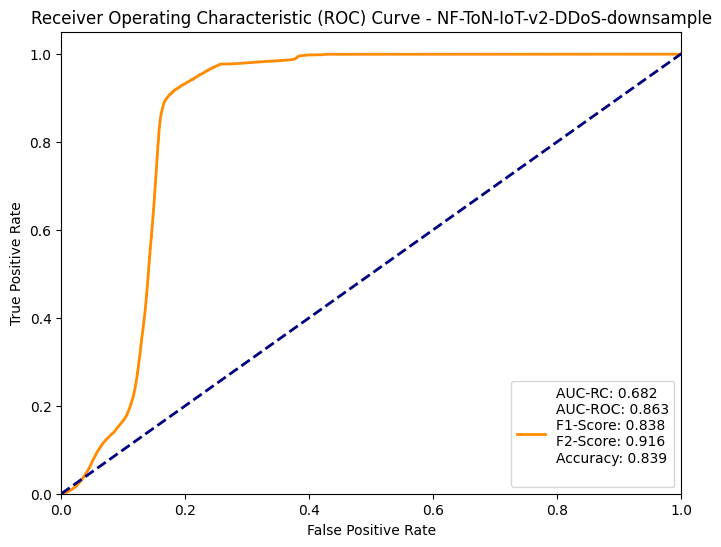

<Figure size 800x600 with 0 Axes>

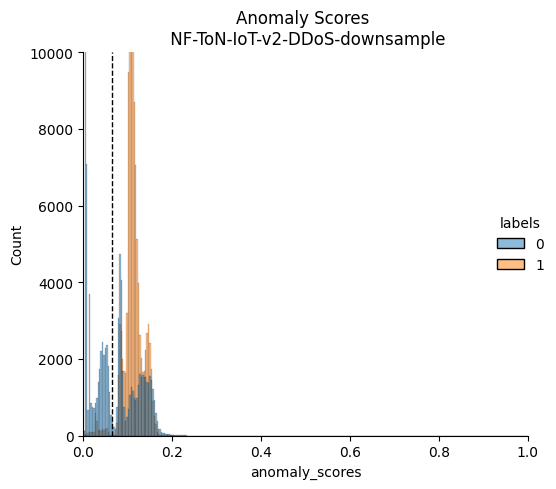

Using the best model selected via  auc_roc
Experiment 'NF-ToN-IoT-v2-DDoS-downsample' Results
Test AUC-RC: 0.682
Test AUC-ROC: 0.863
Test F1-Score: 0.838
Test F2-Score: 0.916
Test Accuracy: 0.839


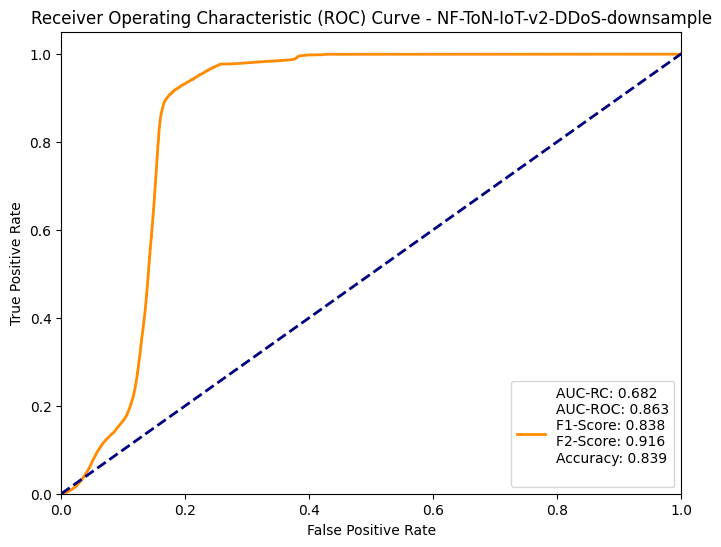

<Figure size 800x600 with 0 Axes>

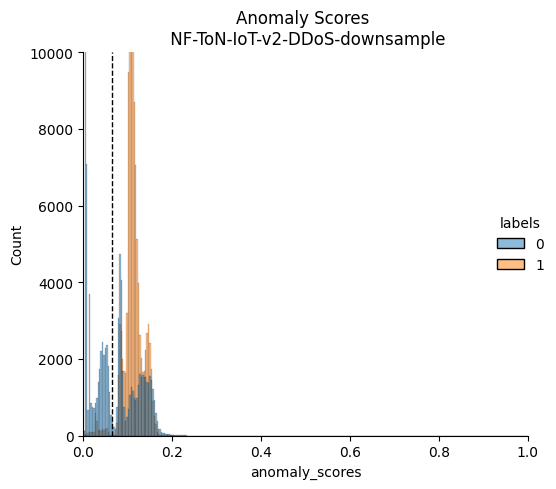

(0.68167746,
 0.86322325,
 0.8376409925878182,
 0.9158261180041058,
 0.8392036427598729)

In [5]:
netflow_trainer.test()

In [33]:
print(tf.__version__)

2.15.0


In [34]:
number_of_samples = 100000

synthetic_dataset = generate_synthetic_data(
                        netflow_trainer.get_generator(), 
                        number_of_samples=number_of_samples, 
                        columns=netflow_dataset.get_columns(),
                        latent_vector_size=hps['latent_vector_size'],
                        scaler=netflow_dataset.get_scaler())

# synthetic_dataset
synthetic_dataset.to_parquet("./datasets/synthetic_ton_iot_ganomaly.parquet")

In [35]:
test_df = netflow_dataset.get_test_distribution()

test_df

,PROTOCOL,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,...,CLIENT_RESET,CLIENT_SYNCHRONISATION,CLIENT_FIN,SERVER_URGENT_POINTER,SERVER_ACKNOWLEDGEMENT,SERVER_PUSH,SERVER_RESET,SERVER_SYNCHRONISATION,SERVER_FIN,Label
0,6.0,120.0,2.0,104.0,2.0,4294951.0,16.0,16.0,64.0,64.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
1,6.0,44.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
2,6.0,44.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
3,17.0,138.0,2.0,234.0,2.0,0.0,0.0,0.0,64.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,6.0,44.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282037,6.0,268.0,5.0,164.0,3.0,4294592.0,375.0,328.0,64.0,64.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN
282038,6.0,44.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
282039,6.0,276.0,5.0,172.0,3.0,4294452.0,515.0,515.0,64.0,64.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN
282040,6.0,224.0,4.0,224.0,4.0,4294655.0,281.0,312.0,64.0,64.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN


l:\Experimentos\anomaly-flow\.env\lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
l:\Experimentos\anomaly-flow\.env\lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
l:\Experimentos\anomaly-flow\.env\lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


<Figure size 1000x600 with 0 Axes>

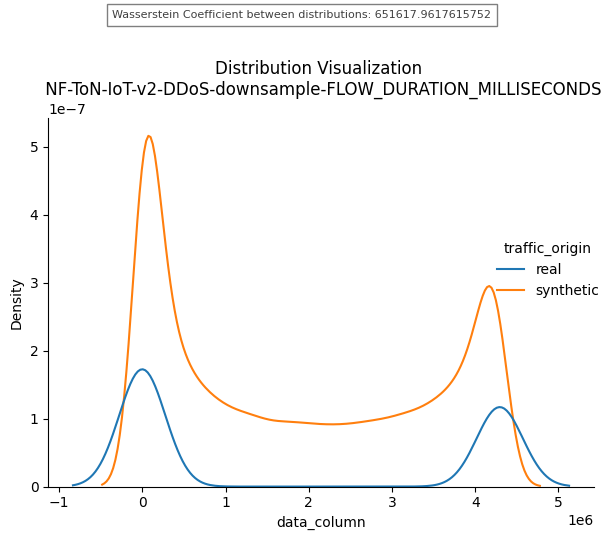

<Figure size 1000x600 with 0 Axes>

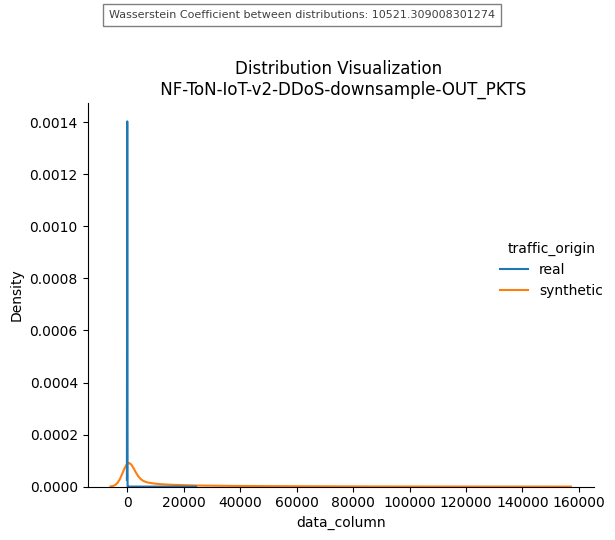

<Figure size 1000x600 with 0 Axes>

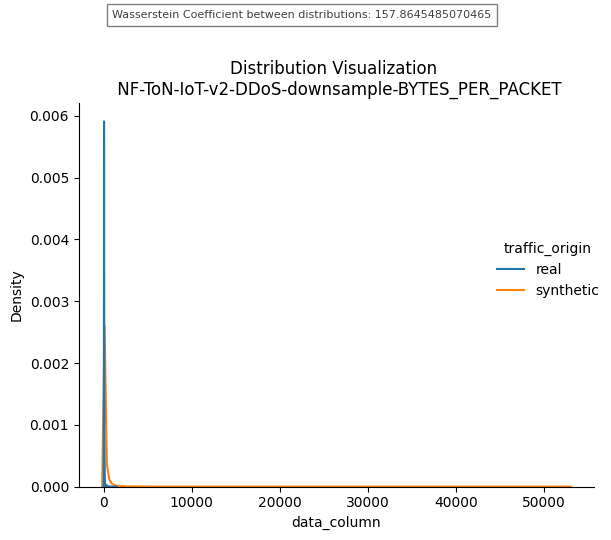

In [36]:
# features_to_plot = list(test_df.columns)
features_to_plot = ["FLOW_DURATION_MILLISECONDS", "OUT_PKTS", "BYTES_PER_PACKET"]

# Filter only the benign samples to evaluate
test_df = netflow_dataset.get_test_distribution()
test_df = test_df[test_df["Label"] == 0]

test_df["BYTES_PER_PACKET"] = test_df["IN_BYTES"] / test_df["IN_PKTS"]
synthetic_dataset["BYTES_PER_PACKET"] = synthetic_dataset["IN_BYTES"] / synthetic_dataset["IN_PKTS"]

for i, feature in enumerate(features_to_plot):
    generate_dist_plot(
        series=test_df[feature][:number_of_samples], 
        comparison_series=synthetic_dataset[feature], 
        title=f"{dataset_name}-{feature}", 
        save_to_file=True,
        ax=None
    )